In [1]:
from __future__ import division
import json 
import numpy as np 
from collections import defaultdict

#matplotlib inline for jupyter notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# training sizes

In [3]:
x_train_sizes = np.arange(7, 14, 1)
#x_train_sizes = np.arange(7, 10, 1)
print x_train_sizes

[ 7  8  9 10 11 12 13]


In [4]:
def get_mae(eval_metrics):
    return np.mean(np.array(eval_metrics['ae_map']))

def get_ci(eval_metrics):
    return np.mean(np.array(eval_metrics['conf_0.9']))

In [5]:
model2tsize2mae = defaultdict(lambda : defaultdict(list))
model2tsize2ci = defaultdict(lambda : defaultdict(list))
for model in ['pcc', 'hybrid']:
    for tsize in x_train_sizes:
        for trial in np.arange(1, 11, 1):
            eval_metrics  = json.load(open('../code/eval/results_tsize{0}/{1}_trial{2}.json'.format(tsize, model, trial), 'r'))
            mae = get_mae(eval_metrics)
            ci = get_ci(eval_metrics)
            model2tsize2mae[model][tsize].append(mae)
            model2tsize2ci[model][tsize].append(ci)

In [6]:
# #load in the results 
# model2tsize2mae = json.load(open('../code/eval/trainsize_forgraphs/model2tsize2mae.json', 'r'))
# model2tsize2ci = json.load(open('../code/eval/trainsize_forgraphs/model2tsize2ci.json', 'r'))

In [7]:
#get means
model2mae_mean = defaultdict(list)
model2ci_mean = defaultdict(list)

for model in model2tsize2mae.keys():
    print model 
    for tsize in x_train_sizes:
        model2mae_mean[model].append(np.mean(np.array(model2tsize2mae[model][tsize])))
        model2ci_mean[model].append(np.mean(np.array(model2tsize2ci[model][tsize])))

pcc
hybrid


In [8]:
print model2tsize2mae['hybrid'][7]

[0.2464564059241427, 0.13932101164219302, 0.07296362405816072, 0.22139081257522036, 0.22865495459231425, 0.10735393638295074, 0.7842289105519041, 0.1118235258287383, 0.1714364691272401, 0.8219989105519042]


In [9]:
print model2mae_mean

defaultdict(<type 'list'>, {'pcc': [0.12580895719678276, 0.09034627093121468, 0.06880502387363871, 0.05787185055162969, 0.048761068817237345, 0.04192364236602465, 0.03589294975819253], 'hybrid': [0.2905628561234769, 0.11161661045087261, 0.06756074973994124, 0.05175971398255983, 0.048921571629263694, 0.042419951204541326, 0.03536672247770137]})


In [10]:
xticks_labels = ['$2^{{{0}}}$'.format(xx) for xx in x_train_sizes]
print xticks_labels

['$2^{7}$', '$2^{8}$', '$2^{9}$', '$2^{10}$', '$2^{11}$', '$2^{12}$', '$2^{13}$']


In [11]:
def plot_mae(plt):
#     plt.scatter(x_train_proportions, mae1, c='r', label='PB-PCC', marker='x')
#     plt.plot(x_train_proportions, mae1, c='r')
#     plt.scatter(x_train_proportions, mae2, c='b', label='LR-Implicit')
#     plt.plot(x_train_proportions, mae2, c='b')
    
    for tsize in x_train_sizes:
#         pcc = plt.scatter(np.ones(10)*(2.0**tsize), model2tsize2mae['pcc'][tsize], c='r', marker='x', label='PB-PCC')
#         impl = plt.scatter(np.ones(10)*(2.0**tsize), model2tsize2mae['hybrid'][tsize], c='b', label='LR-Implicit')
        pcc = plt.scatter(np.ones(10)*tsize, model2tsize2mae['pcc'][tsize], c='r', marker='x', label='PB-PCC', s=75)
        impl = plt.scatter(np.ones(10)*tsize, model2tsize2mae['hybrid'][tsize], c='b', label='LR-Implicit', s=75)
    
    #x_vals = [2.0**xx for xx in x_train_sizes]
    x_vals = x_train_sizes
    plt.plot(x_vals, model2mae_mean['pcc'], c='r')
    plt.plot(x_vals, model2mae_mean['hybrid'], c='b')
    plt.ylim(0, 0.3)
    plt.xlabel('Train size (num. train docs.)', fontsize=40)
    plt.ylabel('MAE', fontsize=40)
    plt.xticks(x_vals, xticks_labels, fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.legend(handles=[pcc, impl], fontsize=30)
    return plt 

In [12]:
def plot_ci(plt):
#     plt.scatter(x_train_proportions, ci1, c='r', marker='x')
#     plt.plot(x_train_proportions, ci1, c='r')
#     plt.scatter(x_train_proportions, ci2, c='b')
#     plt.plot(x_train_proportions, ci2, c='b')
    for tsize in x_train_sizes:
#         pcc = plt.scatter(np.ones(10)*(2.0**tsize), model2tsize2ci['pcc'][tsize], c='r', marker='x', label='PB-PCC')
#         impl = plt.scatter(np.ones(10)*(2.0**tsize), model2tsize2ci['hybrid'][tsize], c='b', label='LR-Implicit')
        pcc = plt.scatter(np.ones(10)*tsize, model2tsize2ci['pcc'][tsize], c='r', marker='x', label='PB-PCC', s=75)
        impl = plt.scatter(np.ones(10)*tsize, model2tsize2ci['hybrid'][tsize], c='b', label='LR-Implicit', s=75)
    #x_vals = [2.0**xx for xx in x_train_sizes]
    x_vals = x_train_sizes
    print x_vals
    plt.plot(x_vals, model2ci_mean['pcc'], c='r')
    plt.plot(x_vals, model2ci_mean['hybrid'], c='b')
    plt.xlabel('Train size (num. train docs.)', fontsize=40)
    plt.ylabel('CI coverage', fontsize=40)
    plt.xticks(x_vals, xticks_labels, fontsize = 25)
    plt.yticks(fontsize = 25)
    return plt 

[ 7  8  9 10 11 12 13]


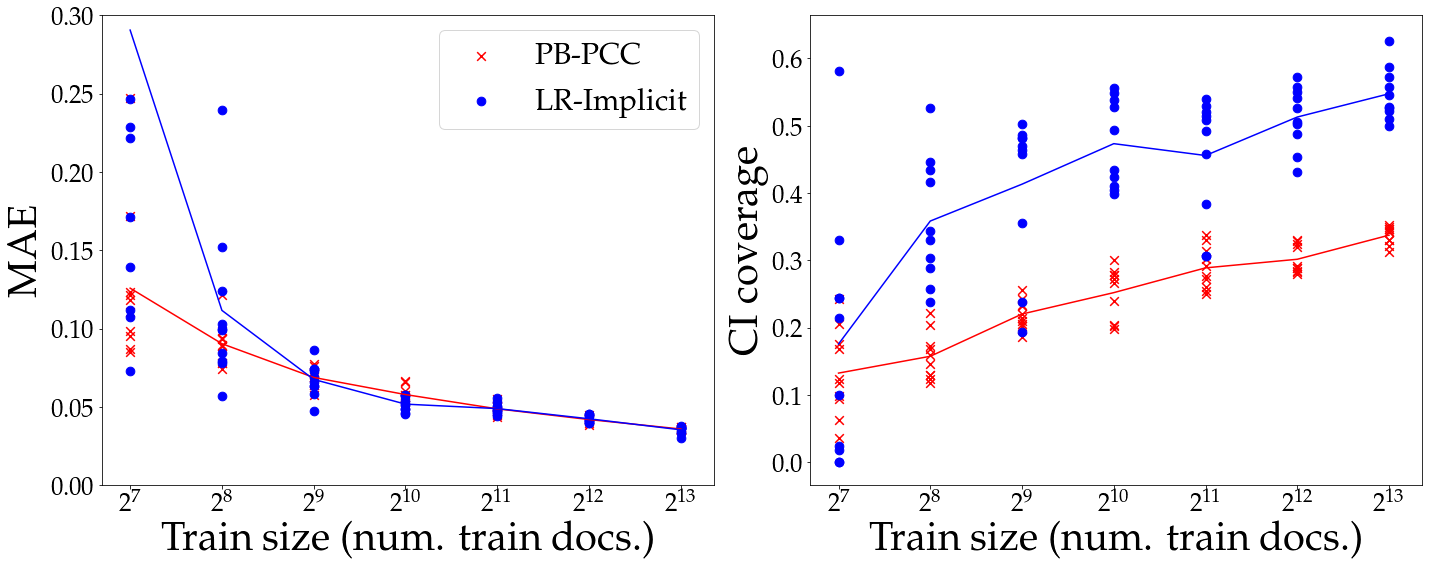

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt = plot_mae(plt)
plt.subplot(122)
plt = plot_ci(plt)
plt.tight_layout()
plt.savefig('../writing/figs/train_size.png', bbox_inches='tight')
plt.show()